# Desafio 3 - Digital House

## 1 - Introdução

##### Projeto com intuito de prever potenciais doenças do coração em pacientes. O dataset foi obtido do __[Repositório UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)__.

## 2 - Desenvolvimento

In [74]:
# Basic / Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D

# Data transformation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Clustering

from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans


# Decomposition

from sklearn.decomposition import PCA

# Machine Learning Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


# Metrics

import sklearn.metrics as metrics

#Pipeline

from sklearn.pipeline import Pipeline

# Other

import warnings
warnings.filterwarnings('ignore')

### Metadata
 <font color=blue>3 age: age in years</font> 
 <br><font color=blue>4 sex: sex</font>
 <br>(1 = male; 0 = female)
 <br><font color=blue>9 cp: chest pain type </font> 
 <br>-- Value 1: typical angina
 <br>-- Value 2: atypical angina
 <br>-- Value 3: non-anginal pain
 <br>-- Value 4: asymptomatic
 <br><font color=blue>10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)</font> 
 <br><font color=blue>12 chol: serum cholestoral in mg/dl</font> 
 <br><font color=blue>16 fbs: (fasting blood sugar > 120 mg/dl)</font> 
 <br> (1 = true; 0 = false)
 <br><font color=blue>19 restecg: resting electrocardiographic results</font> 
 <br>-- Value 0: normal
 <br>-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
            elevation or depression of > 0.05 mV)
 <br>-- Value 2: showing probable or definite left ventricular hypertrophy
            by Estes' criteria
 <br><font color=blue>32 thalach: maximum heart rate achieved</font> 
 <br><font color=blue>38 exang: exercise induced angina</font>
 <br>(1 = yes; 0 = no)
 <br><font color=blue>40 oldpeak = ST depression induced by exercise relative to rest</font> 
 <br><font color=blue>41 slope: the slope of the peak exercise ST segment</font> 
 <br>-- Value 1: upsloping
 <br>-- Value 2: flat
 <br>-- Value 3: downsloping
 <br><font color=blue>44 ca: number of major vessels (0-3) colored by flourosopy</font> 
 <br><font color=blue>51 thal:</font>
 <br>3 = normal; 6 = fixed defect; 7 = reversable defect
 <br><font color=blue>58 target: diagnosis of heart disease (angiographic disease status)</font> 
 <br>-- Value 0: < 50% diameter narrowing
 <br>-- Value 1: > 50% diameter narrowing
 <br>(in any major vessel: attributes 59 through 68 are vessels)

In [75]:
# Data Import


# Feature names
name_cols = ['age', 
         'sex',
         'cp',
         'trestbps', 
         'chol',
         'fbs',
         'restecg', 
         'thalach',
         'exang',
         'oldpeak', 
         'slope',
         'ca', 
         'thal', 
         'target']

# Reading File

df_heart = pd.read_csv('data/processed.cleveland.data', names= name_cols, header=-1)

In [76]:
# taking a look at the data
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [77]:
# checking features types
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [78]:
# checking 'object' type data
df_heart.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [79]:
# checking 'object' type data
df_heart.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [80]:
df_heart.replace(to_replace='?', value= np.nan, inplace=True)
df_heart.dropna(inplace=True)

df_heart.shape

(297, 14)

In [81]:
# Casting as numerical
df_heart.ca = df_heart.ca.astype("float64", copy=False)
df_heart.thal = df_heart.thal.astype("float64", copy=False)

df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null float64
thal        297 non-null float64
target      297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [82]:
# Analysing the overall data
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


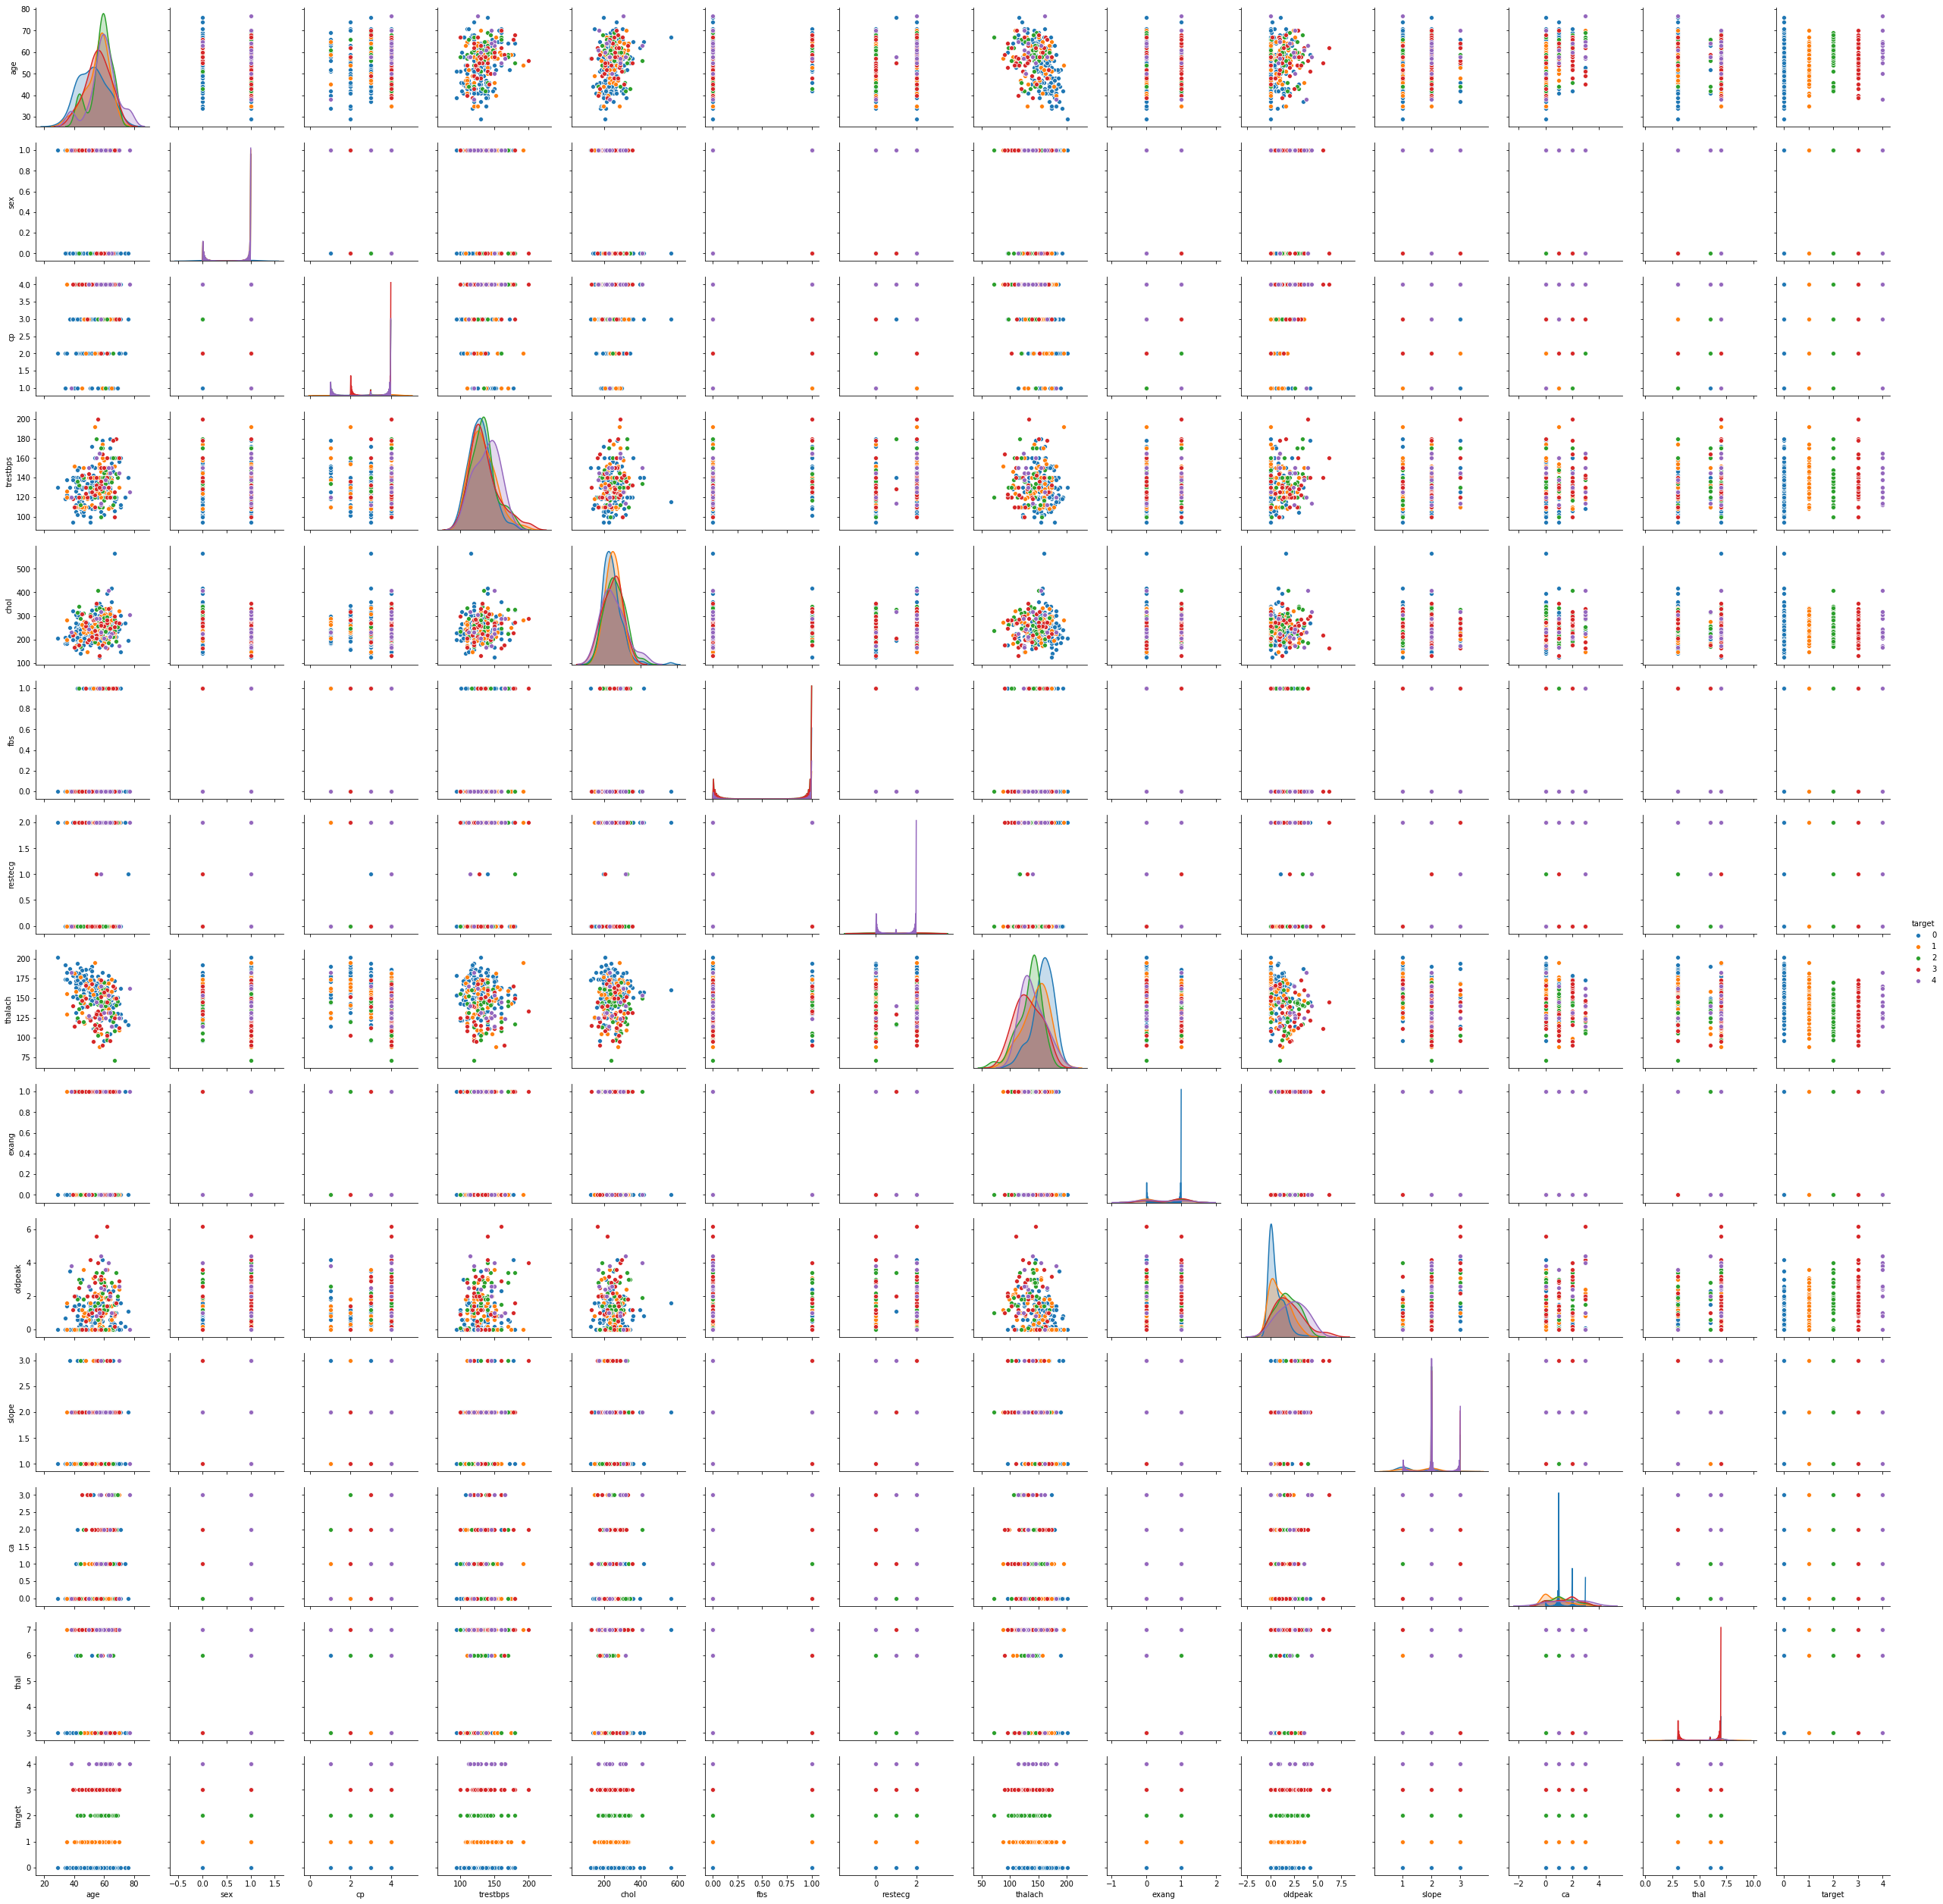

In [83]:
# Visual of the distributions
sns.pairplot(df_heart, hue='target')

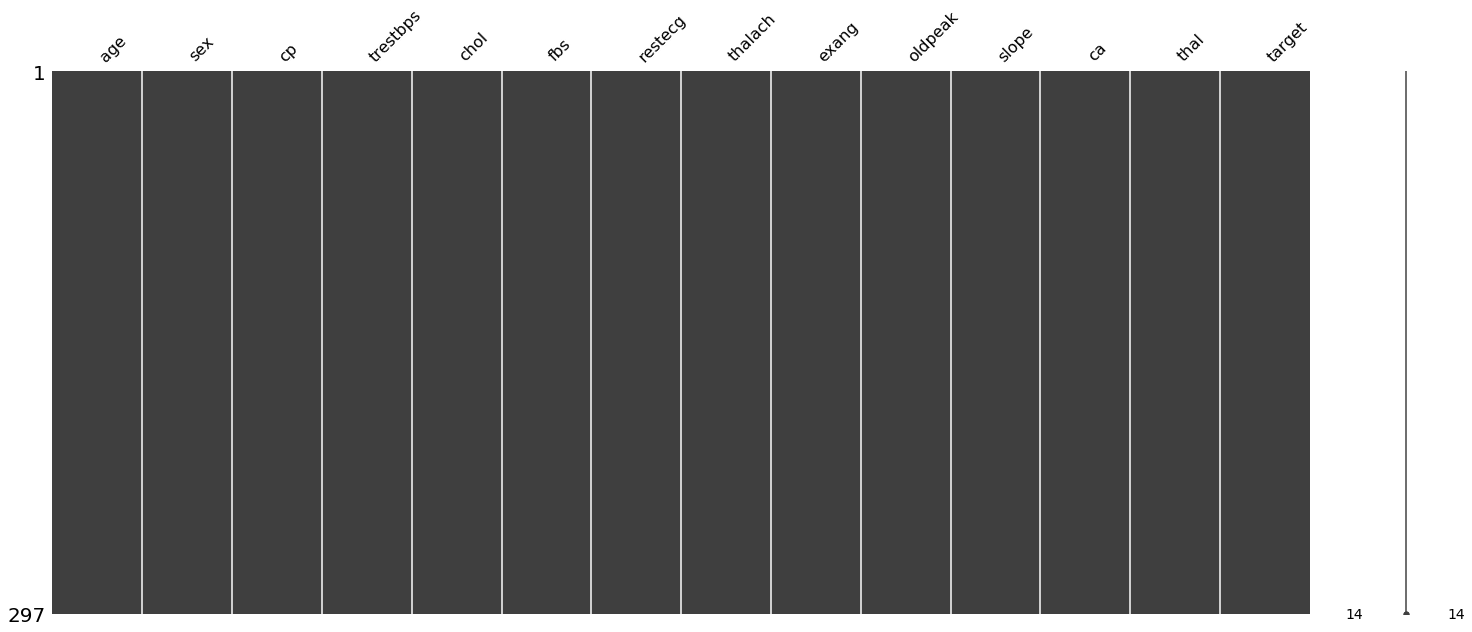

In [84]:
# Double-checking missing values

msno.matrix(df_heart)

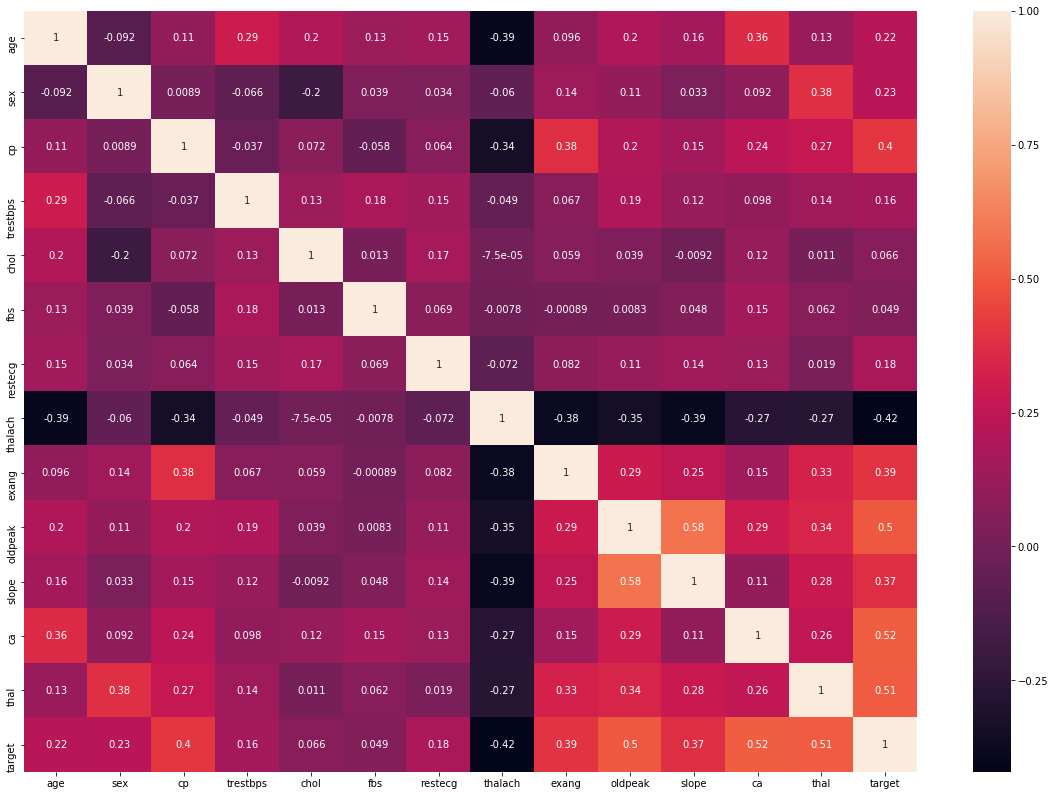

In [85]:
# Setting size for plots

plt.rcParams['figure.figsize'] = (20, 14)

# Correlation map

sns.heatmap(df_heart.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb96dcc7b00>,
      dtype=object)

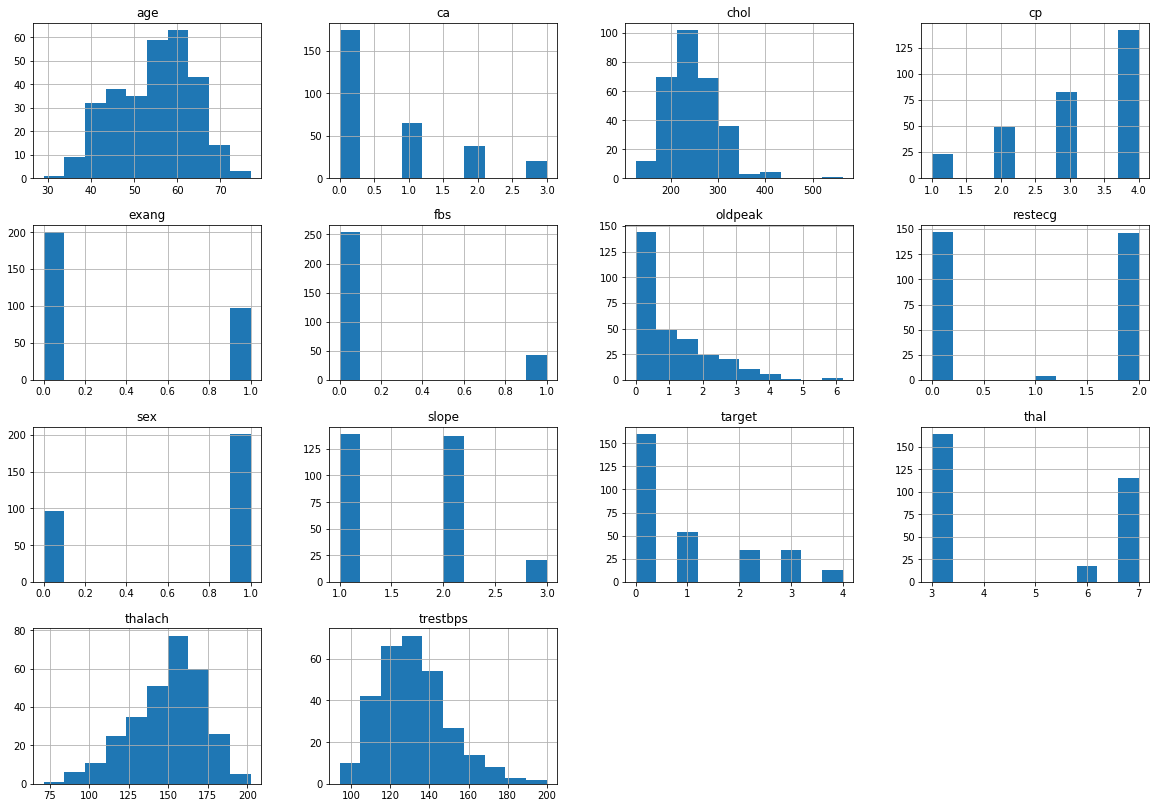

In [86]:
# visualizing histogram

df_heart.hist()

In [88]:
df_heart_cluster = df_heart.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1)

df_heart_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 6 columns):
age         297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
thalach     297 non-null float64
oldpeak     297 non-null float64
target      297 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.2 KB


In [92]:
df_heart_cluster.drop('target',axis=1).shape

(297, 5)

In [112]:

pca = PCA(n_components = 3, random_state = 42)

X_cluster = pca.fit_transform(df_heart_cluster)

ms = MeanShift()
y_cluster = ms.fit_predict(X_cluster)

cluster_centers =ms.cluster_centers_


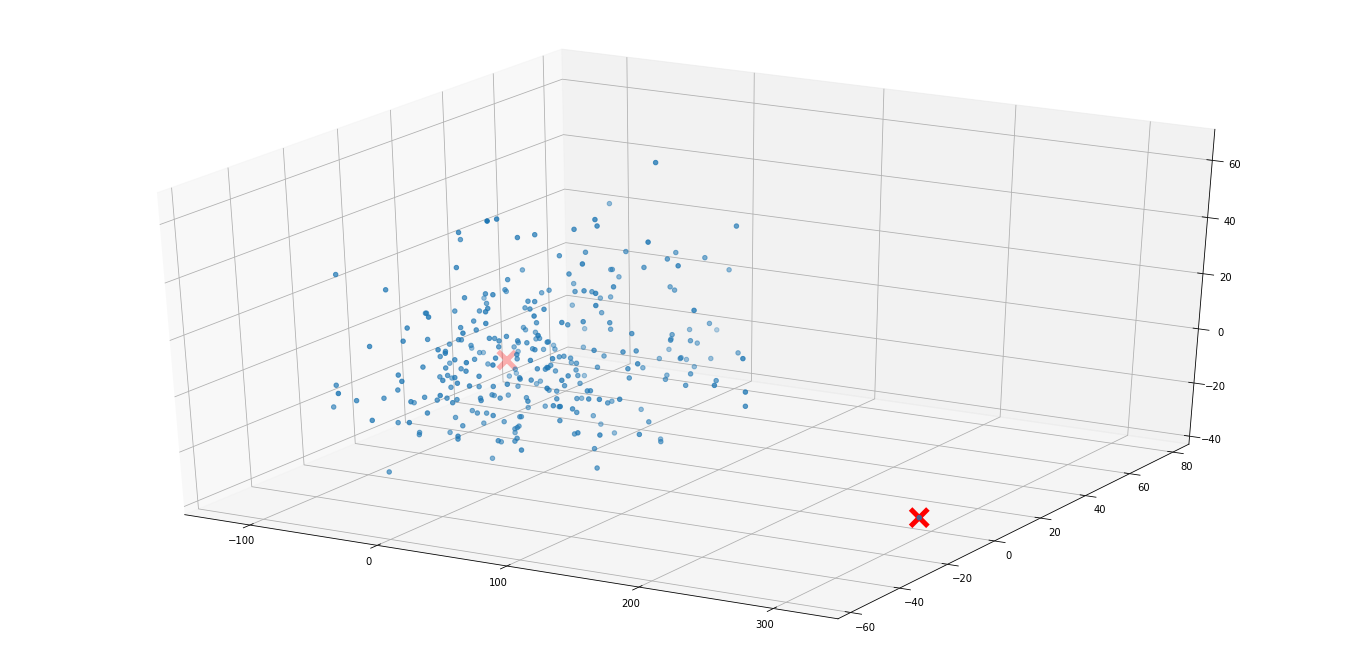

In [113]:

fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_cluster[:,0], X_cluster[:,1], X_cluster[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)


Text(0, 0.5, 'wcss')

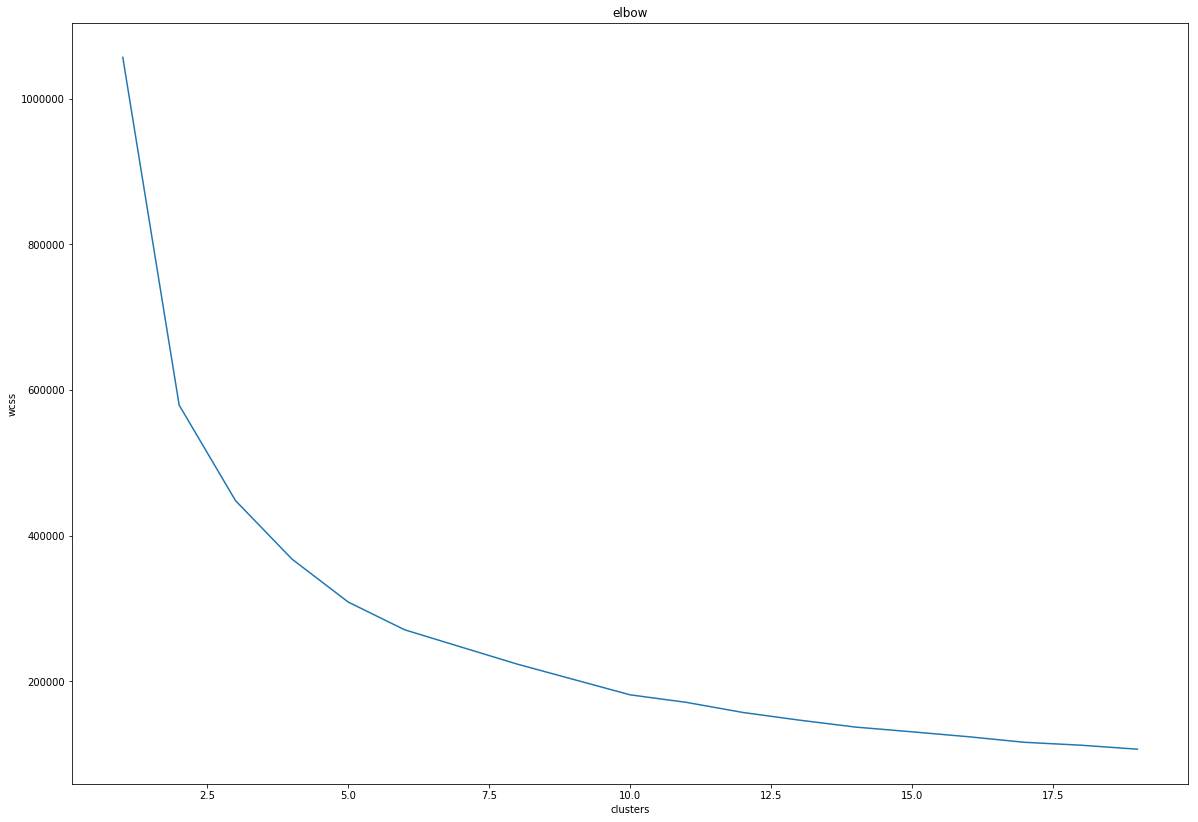

In [120]:
#elbow method
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_cluster)
#     print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('elbow')
plt.xlabel('clusters')
plt.ylabel('wcss')

In [118]:

pca = PCA(n_components = 3, random_state = 42)

X_cluster = pca.fit_transform(df_heart_cluster)

km = KMeans()
y_cluster = km.fit_predict(X_cluster)

cluster_centers =km.cluster_centers_


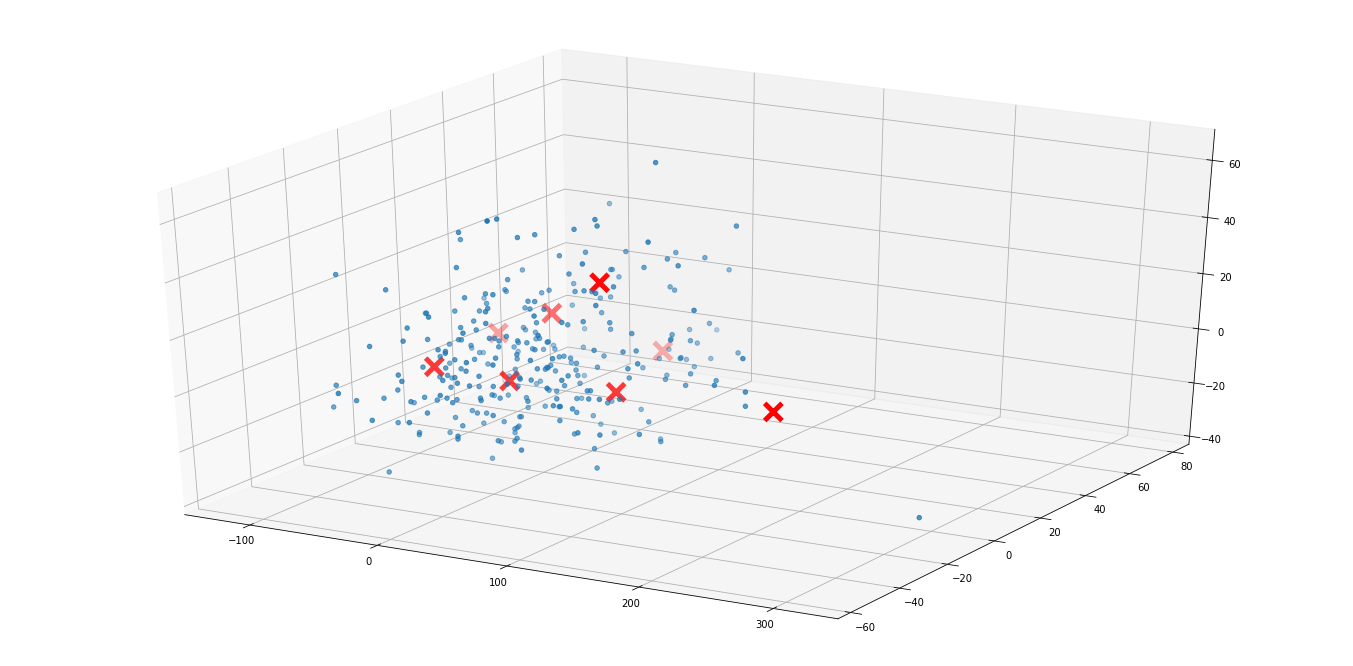

In [119]:

fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_cluster[:,0], X_cluster[:,1], X_cluster[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)


In [89]:
# creating dummies for categorical data

df_heart = pd.get_dummies(df_heart, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

df_heart.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


Analisando o problema, podemos ter uma ideia que será difícil alcançar bons resultados para classificar todas as 5 classes. Decidimos então primeiro separar os pacientes em Doentes e Não Doentes, por acreditarmos ser a classificação de maior importância. Agrupamos então as classes >=1 para 1.

In [15]:
df_heart['target_healthy'] = df_heart.target.apply(lambda x : 1 if x > 0 else 0)

In [16]:
df_heart['target_healthy'].value_counts()

0    160
1    137
Name: target_healthy, dtype: int64

In [17]:
df_heart.target.value_counts()

0    160
1     54
3     35
2     35
4     13
Name: target, dtype: int64

In [18]:
df_heart.target_healthy.value_counts()

0    160
1    137
Name: target_healthy, dtype: int64

In [19]:
# Distributing the dataset into two components

y = df_heart['target_healthy']
X = df_heart.drop(['target_healthy'], axis=1)

In [20]:
# Spliting into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
y_train_mult = X_train['target']
y_test_mult = X_test['target']

X_train = X_train.drop(['target'], axis=1)
X_test = X_test.drop(['target'], axis=1)

In [22]:
y_train.value_counts()

0    124
1    113
Name: target_healthy, dtype: int64

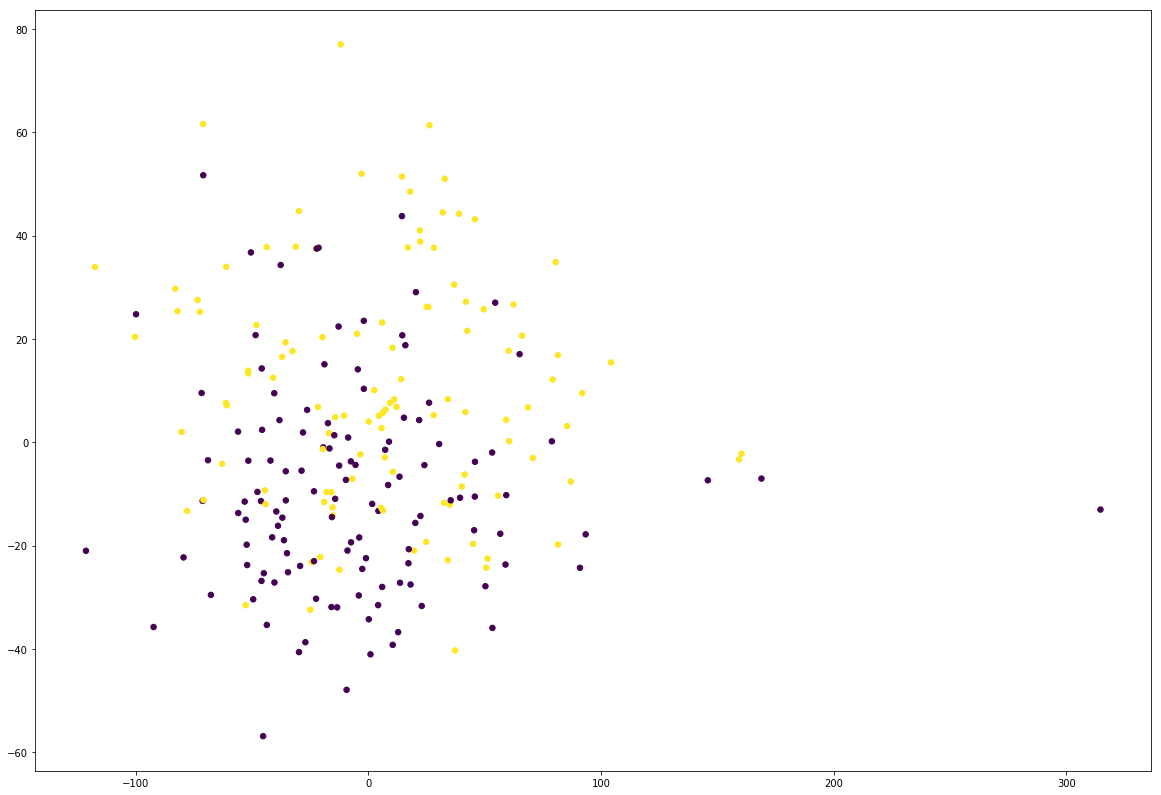

In [70]:
# Applying PCA
pca = PCA(n_components = 2, random_state = 42)

X_train_ = pca.fit_transform(X_train)
X_test_ = pca.transform(X_test)

# Results from PCA
# fig = plt.figure()
# ax = Axes3D(fig)
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_train, s=30)

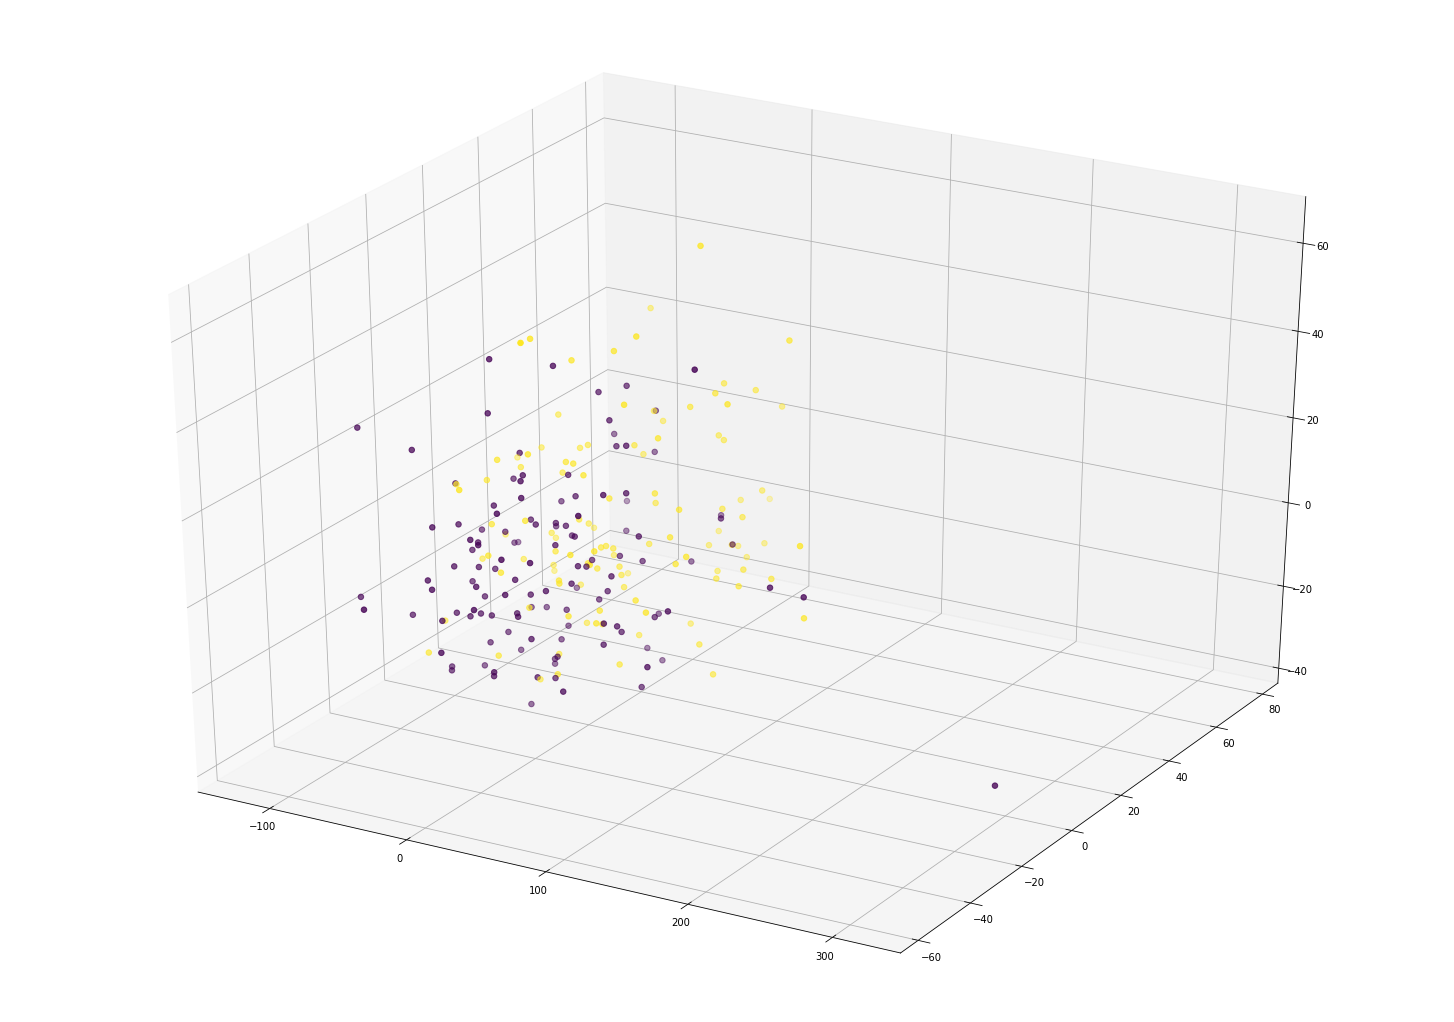

In [71]:
# Applying PCA
pca = PCA(n_components = 3, random_state = 42)

X_train_ = pca.fit_transform(X_train)
X_test_ = pca.transform(X_test)

# Results from PCA
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_[:, 0], X_train_[:, 1],X_train_[:, 2], c=y_train, s=30)

In [24]:
# defining steps for pipelining

steps_0 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('LogisticRegression', LogisticRegression())]
steps_1 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('SVM', SVC())]
steps_2 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('RandomForest', RandomForestClassifier())]
steps_3 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('KNC', KNeighborsClassifier())]
steps_4 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('Decision', DecisionTreeClassifier())]
steps_5 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('GBoost', GradientBoostingClassifier())]
steps_6 = [('scaler',StandardScaler()),('pca',PCA(n_components=3)),('Gaussian', GaussianNB())]

In [25]:
# creating pipelines

pipeline_0 = Pipeline(steps_0)
pipeline_1 = Pipeline(steps_1)
pipeline_2 = Pipeline(steps_2)
pipeline_3 = Pipeline(steps_3)
pipeline_4 = Pipeline(steps_4)
pipeline_5 = Pipeline(steps_5)
pipeline_6 = Pipeline(steps_6)

In [26]:
# parameters grid for gridsearchcv

parameters_0 = {"LogisticRegression__C": np.logspace(-3,3,7), 
                "LogisticRegression__penalty":["l1","l2"]}
parameters_1 = {'SVM__C':[0.001,0.1,10,100,10e5], 
                'SVM__gamma':[0.1,0.01]
               }
parameters_2 = {
    'RandomForest__bootstrap': [True],
    'RandomForest__max_depth': [80, 90, 100, 110],
    'RandomForest__max_features': [2, 3],
    'RandomForest__min_samples_leaf': [3, 4, 5],
    'RandomForest__min_samples_split': [8, 10, 12],
    'RandomForest__n_estimators': [100, 200, 300, 1000]
                }
parameters_3 = {
    'KNC__n_neighbors': [3,5,11,19],
    'KNC__weights': ['uniform','distance'],
    'KNC__metric': ['euclidean', 'manhattan']
                }

parameters_4 = {'Decision__min_samples_split' : range(10,500,20),
                'Decision__max_depth': range(1,20,2)
               }

parameters_5 = {
    "GBoost__loss":["deviance"],
    "GBoost__learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "GBoost__min_samples_split": np.linspace(0.1, 0.5, 12),
    "GBoost__min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "GBoost__max_depth":[3,5,8],
    "GBoost__max_features":["log2","sqrt"],
    "GBoost__criterion": ["friedman_mse",  "mae"],
    "GBoost__subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "GBoost__n_estimators":[10]
    }

parameters_6 = {}

In [27]:
# defining gridsearches

grid_0 = GridSearchCV(pipeline_0, param_grid=parameters_0)
grid_1 = GridSearchCV(pipeline_1, param_grid=parameters_1)
grid_2 = GridSearchCV(pipeline_2, param_grid=parameters_2)
grid_3 = GridSearchCV(pipeline_3, param_grid=parameters_3)
grid_4 = GridSearchCV(pipeline_4, param_grid=parameters_4)
grid_5 = GridSearchCV(pipeline_5, param_grid=parameters_5)
grid_6 = GridSearchCV(pipeline_6, param_grid=parameters_6)

In [28]:
# Running every grid and comparing results


classifiers = [
    grid_0,
    grid_1,
    grid_2,
    grid_3,
    grid_4,
    grid_5,
    grid_6]


classifiers_names = [
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "DecisionTreeClassifier",
    "GradientBoostingClassifier",
    "GaussianNB"  
]

for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    name = classifiers_names[i]
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

LogisticRegression
****Results****
Accuracy: 0.9
Precision: 0.875
Recall: 0.875
SVC
****Results****
Accuracy: 0.9
Precision: 0.875
Recall: 0.875
RandomForestClassifier
****Results****
Accuracy: 0.8666666666666667
Precision: 0.8333333333333334
Recall: 0.8333333333333334
KNeighborsClassifier
****Results****
Accuracy: 0.8666666666666667
Precision: 0.8076923076923077
Recall: 0.875
DecisionTreeClassifier
****Results****
Accuracy: 0.8833333333333333
Precision: 0.9473684210526315
Recall: 0.75
GradientBoostingClassifier
****Results****
Accuracy: 0.8166666666666667
Precision: 0.9333333333333333
Recall: 0.5833333333333334
GaussianNB
****Results****
Accuracy: 0.9
Precision: 0.875
Recall: 0.875


In [29]:
voting_classifiers = [
    ('logistic', grid_0.best_estimator_),
    ('svm', grid_1.best_estimator_),
    ('randomforest', grid_2.best_estimator_),
    ('knc', grid_3.best_estimator_),
    ('GaussinNB', grid_6.best_estimator_),
]

v_clf_bin = VotingClassifier(voting_classifiers, n_jobs=-1)

print('****Results****')
v_clf_bin.fit(X_train,y_train)
y_pred = v_clf_bin.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test,y_pred))

****Results****
Accuracy: 0.9166666666666666
Precision: 0.88
Recall: 0.9166666666666666
Confusion Matrix: [[33  3]
 [ 2 22]]


In [30]:
# Defining new dataset for multiclass classifiyng

df_heart[df_heart['target_healthy'] == 1]
df_heart_mult = df_heart[df_heart['target_healthy'] == 1].drop(['target_healthy'], axis=1)

df_heart_mult.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
6,62.0,140.0,268.0,160.0,3.6,3,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8,63.0,130.0,254.0,147.0,1.4,2,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
9,53.0,140.0,203.0,155.0,3.1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1


In [31]:
df_heart_mult['target'].value_counts()

1    54
3    35
2    35
4    13
Name: target, dtype: int64

In [32]:
# new train test split

y_mult = df_heart_mult['target']
X_mult = df_heart_mult.drop(['target'], axis=1)

X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_mult,y_mult, test_size=0.2, random_state=42, stratify=y_mult)

In [33]:
np.unique(y_train_mult, return_counts=True)

(array([1, 2, 3, 4]), array([43, 28, 28, 10]))

In [34]:
# RESAMPLE
from imblearn.over_sampling import RandomOverSampler

# resample y minority classes by oversampling them
ros = RandomOverSampler(random_state=42)
X_train_mult_resampled, y_train_mult_resampled = ros.fit_resample(X_train_mult, y_train_mult)

# check new classes distributions
y_train_mult_resampled.shape
np.unique(y_train_mult_resampled, return_counts=True)

(array([1, 2, 3, 4]), array([43, 43, 43, 43]))

In [39]:
# Running every grid and comparing results


classifiers = [
    grid_0,
    grid_1,
    grid_2,
    grid_3,
    grid_4,
    grid_5,
    grid_6
]



classifiers_names = [
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "DecisionTreeClassifier",
    "GradientBoostingClassifier",
    "GaussianNB"  
]


for i, clf in enumerate(classifiers):
    clf.fit(X_train_mult_resampled, y_train_mult_resampled)
    name = classifiers_names[i]
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test_mult)
    print("Accuracy:", metrics.accuracy_score(y_test_mult, y_pred))
    print("Precision:", metrics.precision_score(y_test_mult, y_pred,average='macro'))
    print("Recall:", metrics.recall_score(y_test_mult, y_pred,average='macro'))

LogisticRegression
****Results****
Accuracy: 0.32142857142857145
Precision: 0.25721153846153844
Recall: 0.32575757575757575
SVC
****Results****
Accuracy: 0.32142857142857145
Precision: 0.24851190476190477
Recall: 0.2694805194805195
RandomForestClassifier
****Results****
Accuracy: 0.2857142857142857
Precision: 0.3790849673202614
Recall: 0.2597402597402597
KNeighborsClassifier
****Results****
Accuracy: 0.21428571428571427
Precision: 0.16666666666666666
Recall: 0.17532467532467533
DecisionTreeClassifier
****Results****
Accuracy: 0.42857142857142855
Precision: 0.4056818181818182
Recall: 0.35064935064935066
GradientBoostingClassifier
****Results****
Accuracy: 0.32142857142857145
Precision: 0.20833333333333331
Recall: 0.2564935064935065
GaussianNB
****Results****
Accuracy: 0.25
Precision: 0.275297619047619
Recall: 0.18506493506493504


In [61]:
# creating voting classifier with the best results


voting_classifiers_mult = [
    ('logistic', grid_0.best_estimator_),
    ('svm', grid_1.best_estimator_),
    ('randomforest', grid_2.best_estimator_),
    ('Decision', grid_4.best_estimator_),
    ('Gboost', grid_5.best_estimator_),
]

v_clf_mult = VotingClassifier(voting_classifiers_mult, n_jobs=-1)


print('****Results****')
v_clf_mult.fit(X_train_mult_resampled, y_train_mult_resampled)
y_pred = v_clf_mult.predict(X_test_mult)
print("Accuracy:", metrics.accuracy_score(y_test_mult, y_pred))
print("Precision:", metrics.precision_score(y_test_mult, y_pred,average='macro'))
print("Recall:", metrics.recall_score(y_test_mult, y_pred,average='macro'))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test_mult,y_pred))

****Results****
Accuracy: 0.32142857142857145
Precision: 0.28733766233766234
Recall: 0.2694805194805195
Confusion Matrix:
 [[4 6 0 1]
 [2 4 1 0]
 [2 4 1 0]
 [3 0 0 0]]


In [62]:
# results with the best classifier, decision tree

v_clf_mult = grid_4.best_estimator_

print('****Results****')
v_clf_mult.fit(X_train_mult_resampled, y_train_mult_resampled)
y_pred = v_clf_mult.predict(X_test_mult)
print("Accuracy:", metrics.accuracy_score(y_test_mult, y_pred))
print("Precision:", metrics.precision_score(y_test_mult, y_pred,average='macro'))
print("Recall:", metrics.recall_score(y_test_mult, y_pred,average='macro'))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test_mult,y_pred))


****Results****
Accuracy: 0.42857142857142855
Precision: 0.375
Recall: 0.35064935064935066
Confusion Matrix: 
 [[6 2 3 0]
 [0 3 3 1]
 [2 0 3 2]
 [2 0 1 0]]


In [53]:
# v_clf: bin classifier
# v_clf_mult: multi class classifier

def clf_pipeline(X):

    yhat = []
    yhat_bin = v_clf_bin.predict(X)
    yhat_mult = v_clf_mult.predict(X)
    
    for i, y in enumerate(yhat_bin):
        if y == 0:
            yhat.append(y)
        else:
            yhat.append(yhat_mult[i])
    return yhat

In [122]:

y_ = df_heart['target']
X_ = df_heart.drop(['target_healthy','target'], axis=1)


print("Accuracy:", metrics.accuracy_score(y_,clf_pipeline(X_)))
print("Precision:", metrics.precision_score(y_,clf_pipeline(X_),average='macro'))
print("Recall:", metrics.recall_score(y_,clf_pipeline(X_),average='macro'))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_,clf_pipeline(X_)))


Accuracy: 0.7239057239057239
Precision: 0.6473022744471952
Recall: 0.641464183964184
Confusion Matrix: 
 [[142   5   2  10   1]
 [ 22  20   2   9   1]
 [  1   3  17  11   3]
 [  1   4   1  27   2]
 [  0   2   0   2   9]]


Text(0.5, 114.0, 'Predict')

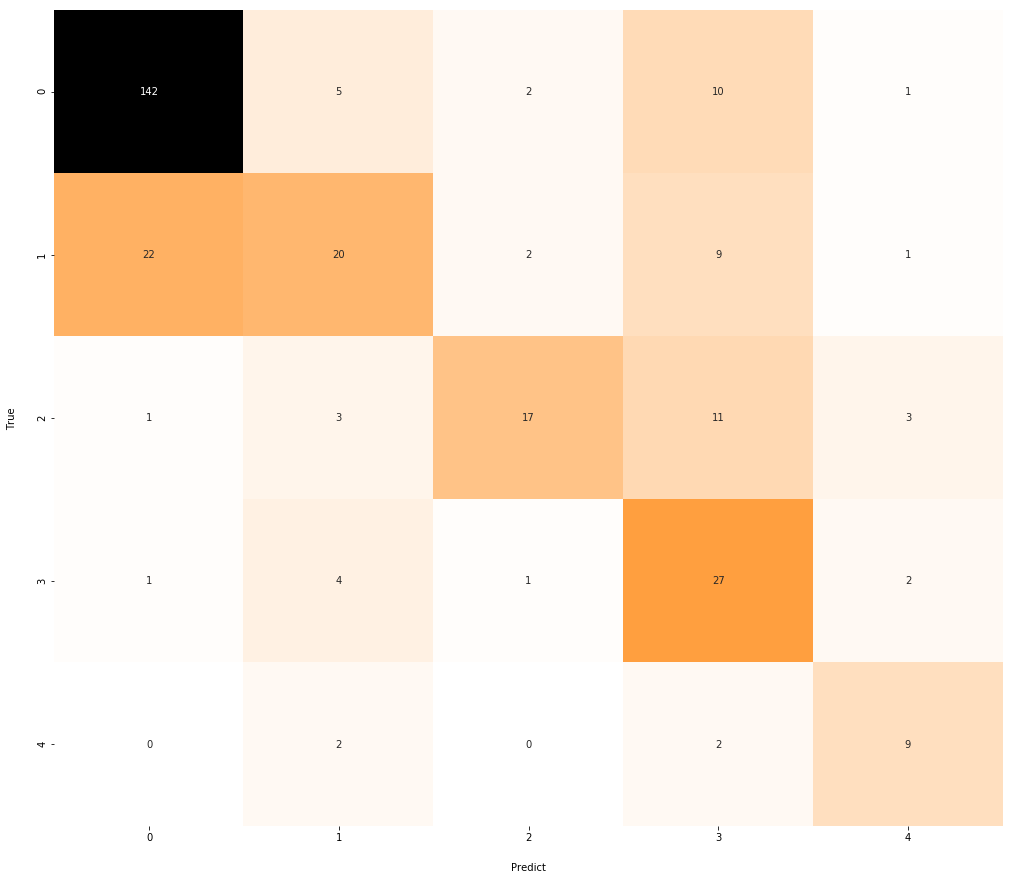

In [140]:
plt.rcParams['figure.figsize'] = (17,15)
sns.heatmap(metrics.confusion_matrix(y_,clf_pipeline(X_)),annot=True,cmap='gist_heat_r',fmt='1',cbar=False)
plt.ylabel('True',labelpad=20)
plt.xlabel('Predict',labelpad=20)